<a href="https://colab.research.google.com/github/tayyaba-20/AAI-practical/blob/main/Practical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BFS Path: A -> B -> D -> E


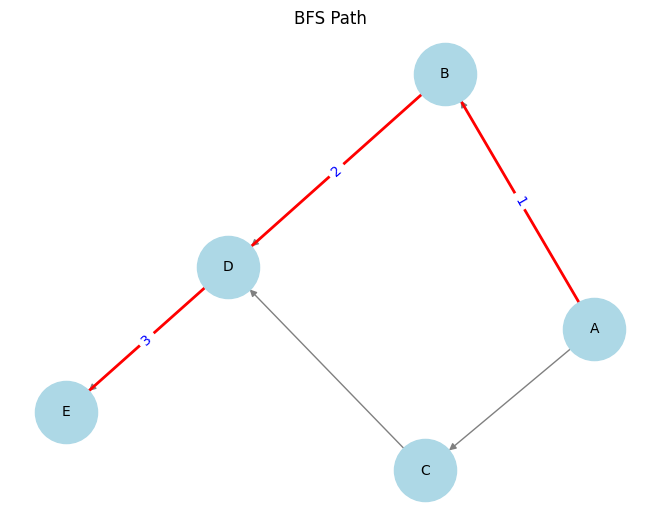

DFS Path: A -> C -> D -> E


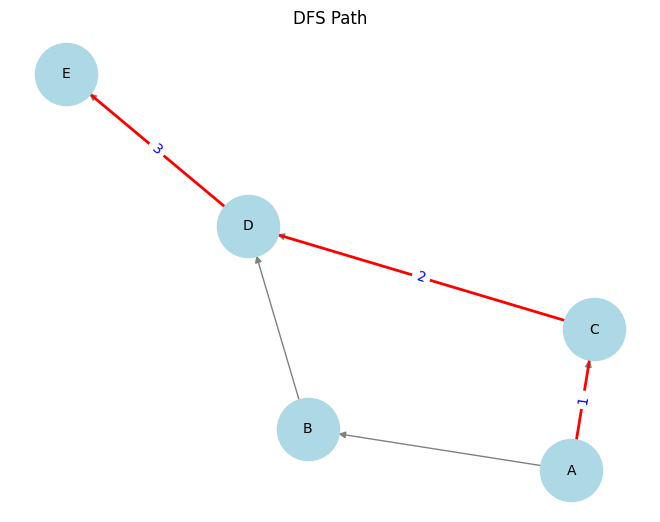

A* Path: A -> B -> D -> E


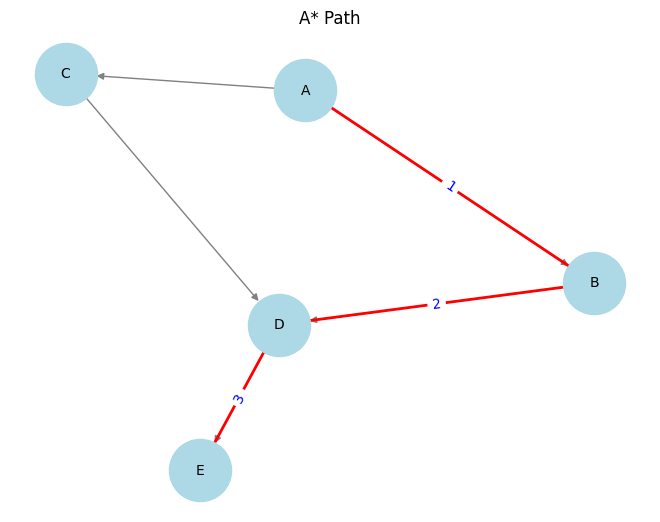

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v, cost=1):
        if u not in self.graph:
            self.graph[u] = []
        self.graph[u].append((v, cost))

    def bfs(self, start, goal):
        queue = [(start, [start])]
        visited = set()

        while queue:
            node, path = queue.pop(0)
            if node in visited:
                continue
            visited.add(node)
            if node == goal:
                print(f"BFS Path: {' -> '.join(path)}")
                return path
            for neighbor, _ in self.graph.get(node, []):
                queue.append((neighbor, path + [neighbor]))
        return None

    def dfs(self, start, goal):
        stack = [(start, [start])]
        visited = set()
        while stack:
            node, path = stack.pop()
            if node in visited:
                continue
            visited.add(node)
            if node == goal:
                print(f"DFS Path: {' -> '.join(path)}")
                return path
            for neighbor, _ in self.graph.get(node, []):
                stack.append((neighbor, path + [neighbor]))
        return None

    def astar(self, start, goal, heuristic):
        pq = [(0, start, [start])]
        visited = set()
        while pq:
            cost, node, path = heapq.heappop(pq)
            if node in visited:
                continue
            visited.add(node)
            if node == goal:
                print(f"A* Path: {' -> '.join(path)}")
                return path
            for neighbor, edge_cost in self.graph.get(node, []):
                heapq.heappush(pq, (cost + edge_cost + heuristic(neighbor), neighbor, path + [neighbor]))
        return None

def heuristic(node):
    return 1  # Dummy heuristic for A*

def visualize_graph(graph, path, title):
    G = nx.DiGraph()
    for node in graph.graph:
        for neighbor, cost in graph.graph[node]:
            G.add_edge(node, neighbor, weight=cost)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
            node_size=2000, font_size=10, arrows=True)
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)
        nx.draw_networkx_edge_labels(G, pos, edge_labels={
            (path[i], path[i+1]): f"{i+1}" for i in range(len(path)-1)}, font_color='blue')

    plt.title(title)
    plt.show()

# Define the graph
G = Graph()
G.add_edge('A', 'B', 1)
G.add_edge('A', 'C', 4)
G.add_edge('B', 'D', 2)
G.add_edge('C', 'D', 1)
G.add_edge('D', 'E', 3)

# Run algorithms and visualize
bfs_path = G.bfs('A', 'E')
visualize_graph(G, bfs_path, "BFS Path")

dfs_path = G.dfs('A', 'E')
visualize_graph(G, dfs_path, "DFS Path")

a_star_path = G.astar('A', 'E', heuristic)
visualize_graph(G, a_star_path, "A* Path")
